# Columbia University FinTech Program: Project 2

### Team Members:
#### Corey Recai
#### Whelan Power
#### Rachel Solomon
#### Ernest Subah

##### Objective: < TBD >

In [30]:
# Import Libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
get_ipython().run_line_magic("matplotlib", "inline")
import spacy
import spacy
import alpaca_trade_api as tradeapi
from spacy import displacy
from datetime import date, datetime, timedelta
nlp = spacy.load("en_core_web_sm")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import re
import nltk
nltk.download("vader_lexicon")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Load Bitcoin file and Get Returns for Past xxx years
bitcoin_price = pd.read_csv(Path('Kraken_BTCUSD.csv'), index_col='Date')

bitcoin_price.head(10)

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
7/2/2020,BTCUSD,9234.5,9269.2,9207.9,9207.9,393.65,3638576.38
7/1/2020,BTCUSD,9133.9,9300.3,9094.2,9234.5,3526.90,32493548.69
6/30/2020,BTCUSD,9183.5,9199.0,9061.3,9133.9,2685.90,24568044.42
6/29/2020,BTCUSD,9113.7,9230.0,9013.0,9183.5,4167.45,38044216.83
6/28/2020,BTCUSD,9002.0,9189.3,8937.5,9113.7,2563.55,23264322.25
6/27/2020,BTCUSD,9150.3,9183.3,8812.8,9002.0,4250.28,38322054.84
6/26/2020,BTCUSD,9233.5,9285.0,9028.6,9150.3,5300.72,48566374.72
6/25/2020,BTCUSD,9282.0,9337.5,8992.4,9233.5,6244.42,57446412.92
6/24/2020,BTCUSD,9622.3,9661.7,9200.0,9282.0,5937.47,55703453.17


In [32]:
# Drop Bitcoing symbol, open, high, low and Volume USD
bitcoin_price.drop(columns=['Symbol', 'Open', 'High', 'Low', 'Volume USD'], inplace=True)

In [33]:
bitcoin_price.head(10)

,Close,Volume BTC
Date,,
7/2/2020,9207.9,393.65
7/1/2020,9234.5,3526.90
6/30/2020,9133.9,2685.90
6/29/2020,9183.5,4167.45
6/28/2020,9113.7,2563.55
6/27/2020,9002.0,4250.28
6/26/2020,9150.3,5300.72
6/25/2020,9233.5,6244.42
6/24/2020,9282.0,5937.47


In [34]:
bitcoin_price.tail(10)

,Close,Volume BTC
Date,,
10/15/2013,133.88,4.30
10/14/2013,135.59,12.01
10/13/2013,131.84,0.10
10/12/2013,127.00,4.00
10/11/2013,125.86,0.00
10/10/2013,125.86,2.00
10/9/2013,123.84,2.82
10/8/2013,124.18,3.99
10/7/2013,123.61,0.10


In [35]:
# Create a new column for price returns
bitcoin_price['Price_Returns'] = bitcoin_price.Close.pct_change()

# Create a new column for Adoption Rate
bitcoin_price['Adoption_Rate'] = bitcoin_price['Volume BTC'].pct_change()

In [36]:
bitcoin_price.head(10)

,Close,Volume BTC,Price_Returns,Adoption_Rate
Date,,,,
7/2/2020,9207.9,393.65,NaN,NaN
7/1/2020,9234.5,3526.90,0.002889,7.959482
6/30/2020,9133.9,2685.90,-0.010894,-0.238453
6/29/2020,9183.5,4167.45,0.005430,0.551603
6/28/2020,9113.7,2563.55,-0.007601,-0.384864
6/27/2020,9002.0,4250.28,-0.012256,0.657966
6/26/2020,9150.3,5300.72,0.016474,0.247146
6/25/2020,9233.5,6244.42,0.009093,0.178032
6/24/2020,9282.0,5937.47,0.005253,-0.049156


In [37]:
# Drop NAs from file
bitcoin_price = bitcoin_price.dropna()
bitcoin_price.head()

,Close,Volume BTC,Price_Returns,Adoption_Rate
Date,,,,
7/1/2020,9234.5,3526.90,0.002889,7.959482
6/30/2020,9133.9,2685.90,-0.010894,-0.238453
6/29/2020,9183.5,4167.45,0.005430,0.551603
6/28/2020,9113.7,2563.55,-0.007601,-0.384864
6/27/2020,9002.0,4250.28,-0.012256,0.657966


In [38]:
# Reorder the columns
bitcoin_price = bitcoin_price[['Close', 'Price_Returns', 'Volume BTC', 'Adoption_Rate']]
bitcoin_price.head()

,Close,Price_Returns,Volume BTC,Adoption_Rate
Date,,,,
7/1/2020,9234.5,0.002889,3526.90,7.959482
6/30/2020,9133.9,-0.010894,2685.90,-0.238453
6/29/2020,9183.5,0.005430,4167.45,0.551603
6/28/2020,9113.7,-0.007601,2563.55,-0.384864
6/27/2020,9002.0,-0.012256,4250.28,0.657966


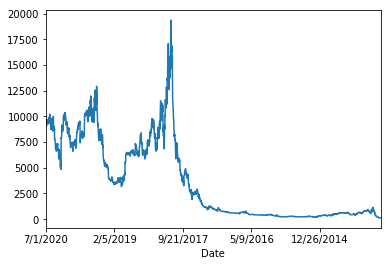

In [39]:
# Bitcoin price over time
bitcoin_price['Close'].plot()

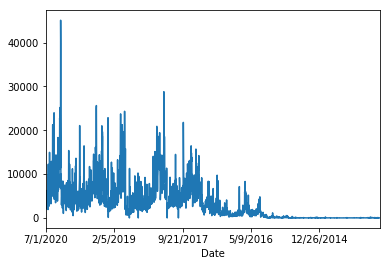

In [40]:
# Bitcoin volume over time
bitcoin_price['Volume BTC'].plot()

## Addition Inputs for the price and volume

### Bitcoin News

In [42]:
# Load Bitcoin/crypto news file and Get news for Past xxx years
bitcoin_news = pd.read_csv(Path('NYT_news_bitcoin.csv'))

bitcoin_news.head(10)

,published_date,snippet,lead_paragraph,headline
0,2017-08-03T20:18:38+0000,After years as a niche market for technologica...,"Most readers have probably heard of Bitcoin, t...",Grandpa Had a Pension. This Generation Has Cry...
1,2018-07-29T20:16:47+0000,With their eyes on blockchain jobs and revenue...,SAN FRANCISCO — Hedge funds go to the Cayman I...,"Have a Cryptocurrency Company? Bermuda, Malta ..."
2,2020-02-12T22:29:15+0000,The rules will improve transparency in hopes o...,WASHINGTON — The Trump administration plans to...,Treasury to Roll Out Cryptocurrency Rules
3,2018-11-21T22:38:57+0000,"A year ago, Bitcoin and other digital currenci...",SAN FRANCISCO — The news on Wall Street this w...,5 Reasons Cryptocurrency Prices Are Plunging A...
4,2018-09-25T19:15:56+0000,"When it comes to Bitcoin and the like, governm...",Cryptocurrencies like Bitcoin have lost over h...,The Trouble With Cryptocurrency’s Viral Growth
5,2018-08-20T09:00:07+0000,The number of people who bought virtual curren...,"SAN FRANCISCO — Pete Roberts of Nottingham, En...",After the Bitcoin Boom: Hard Lessons for Crypt...
6,2019-07-15T23:14:52+0000,The Treasury secretary raised concerns about c...,WASHINGTON — Treasury Secretary Steven Mnuchin...,Cryptocurrencies Pose National Security Threat...
7,2019-01-10T13:07:46+0000,The police have been investigating the woman’s...,OSLO — The wife of a wealthy Norwegian busines...,Cryptocurrency Ransom Demanded for Wife of Nor...
8,2018-01-30T21:47:13+0000,The social network said it wanted to prevent m...,SAN FRANCISCO — Want to get rich quick through...,Facebook Bans Ads for Bitcoin and Other Crypto...
9,2018-03-30T23:01:02+0000,"From Bitcoin to Litecoin to Ethereum, we expla...","From Bitcoin to Litecoin to Ethereum, we expla...",Baffled by Bitcoin? How Cryptocurrency Works
